<a href="https://colab.research.google.com/github/rohanvemu/microfluidics/blob/main/Microfluidics_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Group 3, BE310, Microfluidics Data Analysis

###NB: Do not rename files or reorganize the depth of files! If you have to, be sure to update the file import correctly.

###Importing Libraries


In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
from sklearn.linear_model import LinearRegression
from scipy import stats
import statsmodels.api as sm

###Setting Up File Import

In [ ]:
#Do not change this block of code!
#You need this to access the files in our Shared Google Drive.
#This should be the same and work for all of us. 
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
#Do not change this block of code!
data1 = pd.read_excel('/content/drive/Shareddrives/BE310Lab/MicrofluidicsLab/microfluidicsdata.xlsx', sheet_name = 0)
data2 = pd.read_excel('/content/drive/Shareddrives/BE310Lab/MicrofluidicsLab/microfluidicsdata.xlsx', sheet_name = 1)
data3 = pd.read_excel('/content/drive/Shareddrives/BE310Lab/MicrofluidicsLab/microfluidicsdata.xlsx', sheet_name = 2)
data4 = pd.read_excel('/content/drive/Shareddrives/BE310Lab/MicrofluidicsLab/microfluidicsdata.xlsx', sheet_name = 4)
data5 = pd.read_excel('/content/drive/Shareddrives/BE310Lab/MicrofluidicsLab/microfluidicsdata.xlsx', sheet_name = 5)
data6 = pd.read_excel('/content/drive/Shareddrives/BE310Lab/MicrofluidicsLab/microfluidicsdata.xlsx', sheet_name = 6)

#just change the sheet_name to access another set of data that we analyzed 

Sheet Number and ID FYI


0.   2.00 Trial 1
1.   2.00 Trial 2
2.   2.00 Trial 3
*****************
3.   2.50 Trial 1 (3 drops)
4.   2.50 Trial 2 
5.   2.50 Trial 3
6.   2.50 Trial 4


### Raw Data Plot

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


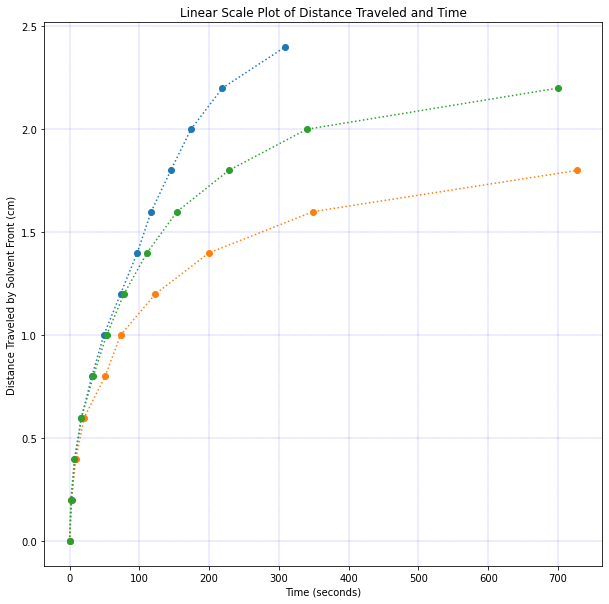

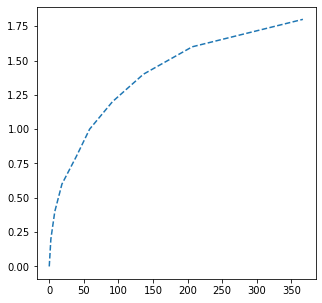

In [ ]:
#normal linear/linear plot
#2.00 Trails
plt.figure(figsize=(10, 10))
plt.plot(data1["Time taken (s)"], data1["Distance (cm)"],linestyle=':',marker='o')
plt.plot(data2["Time taken (s)"], data2["Distance (cm)"],linestyle=':',marker='o')
plt.plot(data3["Time taken (s)"], data3["Distance (cm)"],linestyle=':',marker='o')
plt.xlabel("Time (seconds)")
plt.ylabel("Distance Traveled by Solvent Front (cm)")
plt.title("Linear Scale Plot of Distance Traveled and Time")
plt.grid(color='b', linestyle='--', linewidth=0.2)
mean_2_00_trial=np.mean([data1,data2,data3])
plt.figure(figsize=(5,5))
#plt.plot(mean_2_00_trial["Time taken (s)"], mean_2_00_trial["Distance (cm)"], linestyle ='--')

### Log-Log with Regression

In [ ]:
#data1
logtime1 = np.log10(data1["Time taken (s)"][1::]) #need to exclude element 1 since that corresponds to zero
logdistance1 = np.log10(data1["Distance (cm)"][1::]) #need to exclude element 1 since that corresponds to zero

#data2
logtime2 = np.log10(data2["Time taken (s)"][1::]) #need to exclude element 1 since that corresponds to zero
logdistance2 = np.log10(data2["Distance (cm)"][1::]) #need to exclude element 1 since that corresponds to zero 

#data3
logtime3 = np.log10(data3["Time taken (s)"][1::]) #need to exclude element 1 since that corresponds to zero
logdistance3 = np.log10(data3["Distance (cm)"][1::]) #need to exclude element 1 since that corresponds to zero 

In [ ]:
m1, b1, r_value1, p_value1, std_err1 = stats.linregress(logtime1, logdistance1)

m2, b2, r_value2, p_value2, std_err2 = stats.linregress(logtime2, logdistance2)

m3, b3, r_value3, p_value3, std_err3 = stats.linregress(logtime3, logdistance3)

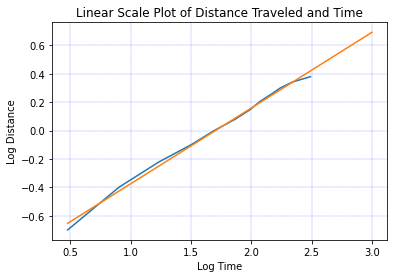

In [ ]:
#Log-Log Plot
plt.figure()
# plt.loglog(data["Time taken (s)"], data["Distance (cm)"])
x = np.linspace(3, 1000, 10001)
real_b = 10**b1
y = real_b*x**m1 
plt.plot(logtime1, logdistance1)
plt.plot(np.log10(x), np.log10(y))

plt.xlabel("Log Time")
plt.ylabel("Log Distance")
plt.title("Linear Scale Plot of Distance Traveled and Time")
plt.grid(color='b', linestyle='--', linewidth=0.2)


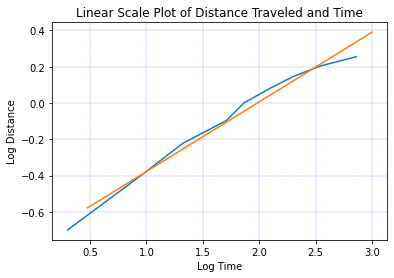

In [ ]:
#Log-Log Plot
plt.figure()
# plt.loglog(data["Time taken (s)"], data["Distance (cm)"])
x = np.linspace(3, 1000, 10001)
real_b = 10**b2
y = real_b*x**m2 
plt.plot(logtime2, logdistance2)
plt.plot(np.log10(x), np.log10(y))

plt.xlabel("Log Time")
plt.ylabel("Log Distance")
plt.title("Linear Scale Plot of Distance Traveled and Time")
plt.grid(color='b', linestyle='--', linewidth=0.2)

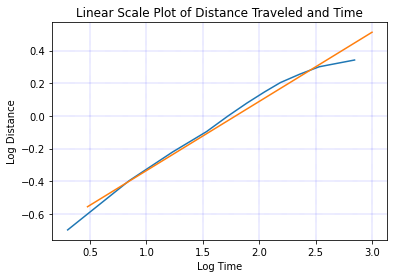

In [ ]:
#Log-Log Plot
plt.figure()
# plt.loglog(data["Time taken (s)"], data["Distance (cm)"])
x = np.linspace(3, 1000, 10001)
real_b = 10**b3
y = real_b*x**m3 
plt.plot(logtime3, logdistance3)
plt.plot(np.log10(x), np.log10(y))

plt.xlabel("Log Time")
plt.ylabel("Log Distance")
plt.title("Linear Scale Plot of Distance Traveled and Time")
plt.grid(color='b', linestyle='--', linewidth=0.2)

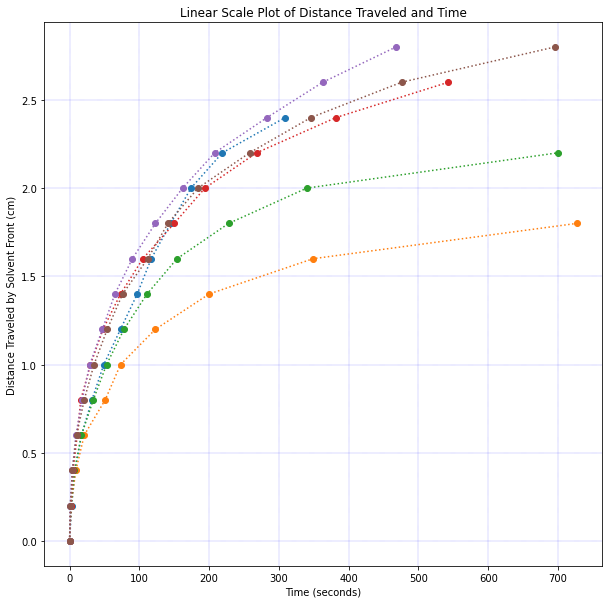

In [ ]:
#normal linear/linear plot
#2.50 Trails
plt.figure(figsize=(10, 10))
plt.plot(data1["Time taken (s)"], data1["Distance (cm)"],linestyle=':',marker='o')
plt.plot(data2["Time taken (s)"], data2["Distance (cm)"],linestyle=':',marker='o')
plt.plot(data3["Time taken (s)"], data3["Distance (cm)"],linestyle=':',marker='o')
plt.plot(data4["Time taken (s)"], data4["Distance (cm)"],linestyle=':',marker='o')
plt.plot(data5["Time taken (s)"], data5["Distance (cm)"],linestyle=':',marker='o')
plt.plot(data6["Time taken (s)"], data6["Distance (cm)"],linestyle=':',marker='o')
plt.xlabel("Time (seconds)")
plt.ylabel("Distance Traveled by Solvent Front (cm)")
plt.title("Linear Scale Plot of Distance Traveled and Time")
plt.grid(color='b', linestyle='--', linewidth=0.2)

In [ ]:
#data4
logtime4 = np.log10(data4["Time taken (s)"][1::]) #need to exclude element 1 since that corresponds to zero
logdistance4 = np.log10(data4["Distance (cm)"][1::]) #need to exclude element 1 since that corresponds to zero

#data5
logtime5 = np.log10(data5["Time taken (s)"][1::]) #need to exclude element 1 since that corresponds to zero
logdistance5 = np.log10(data5["Distance (cm)"][1::]) #need to exclude element 1 since that corresponds to zero 

#data6
logtime6 = np.log10(data6["Time taken (s)"][1::]) #need to exclude element 1 since that corresponds to zero
logdistance6 = np.log10(data6["Distance (cm)"][1::]) #need to exclude element 1 since that corresponds to zero 

In [ ]:

m4, b4, r_value4, p_value4, std_err4 = stats.linregress(logtime4, logdistance4)

m5, b5, r_value5, p_value5, std_err5 = stats.linregress(logtime5, logdistance5)

m6, b6, r_value6, p_value6, std_err6 = stats.linregress(logtime6, logdistance6)


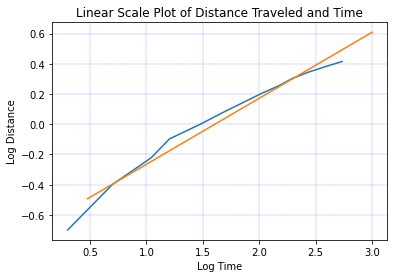

In [ ]:
#Log-Log Plot
plt.figure()
# plt.loglog(data["Time taken (s)"], data["Distance (cm)"])
x = np.linspace(3, 1000, 10001)
real_b = 10**b4
y = real_b*x**m4 
plt.plot(logtime4, logdistance4)
plt.plot(np.log10(x), np.log10(y))

plt.xlabel("Log Time")
plt.ylabel("Log Distance")
plt.title("Linear Scale Plot of Distance Traveled and Time")
plt.grid(color='b', linestyle='--', linewidth=0.2)

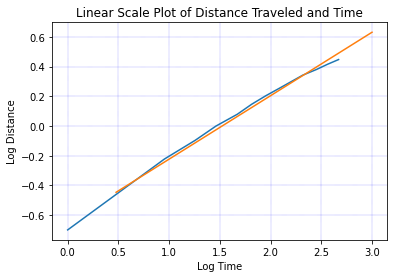

In [ ]:
#Log-Log Plot
plt.figure()
# plt.loglog(data["Time taken (s)"], data["Distance (cm)"])
x = np.linspace(3, 1000, 10001)
real_b = 10**b5
y = real_b*x**m5 
plt.plot(logtime5, logdistance5)
plt.plot(np.log10(x), np.log10(y))

plt.xlabel("Log Time")
plt.ylabel("Log Distance")
plt.title("Linear Scale Plot of Distance Traveled and Time")
plt.grid(color='b', linestyle='--', linewidth=0.2)

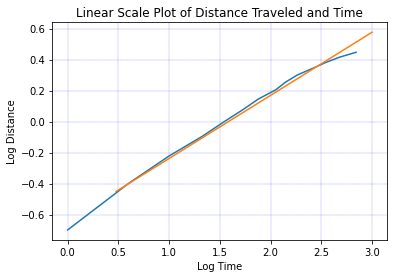

In [ ]:
#Log-Log Plot
plt.figure()
# plt.loglog(data["Time taken (s)"], data["Distance (cm)"])
x = np.linspace(3, 1000, 10001)
real_b = 10**b6
y = real_b*x**m6 
plt.plot(logtime6, logdistance6)
plt.plot(np.log10(x), np.log10(y))

plt.xlabel("Log Time")
plt.ylabel("Log Distance")
plt.title("Linear Scale Plot of Distance Traveled and Time")
plt.grid(color='b', linestyle='--', linewidth=0.2)

In [ ]:
print("I got this far in code")

I got this far in code


In [ ]:
# use polyfit to determine loglog slopes

#wait we technically don't need this block...we can just use 
p = np.polyfit(logtime1, logdistance1, 1)
print(p)

p = np.polyfit(logtime2, logdistance2, 1)
print(p)

p = np.polyfit(logtime3, logdistance3, 1)
print(p)

p = np.polyfit(logtime4, logdistance4, 1)
print(p)

p = np.polyfit(logtime5, logdistance5, 1)
print(p)

p = np.polyfit(logtime6, logdistance6, 1)
print(p)

[ 0.53328213 -0.90692391]
[ 0.38338022 -0.76038428]
[ 0.42390277 -0.75910316]
[ 0.43642614 -0.70082538]
[ 0.42683876 -0.64962151]
[ 0.40716255 -0.64504549]


In [ ]:
# 2 mm channels
time1 = data1["Time taken (s)"]
dist1 = data1["Distance (cm)"]

time2 = data2["Time taken (s)"]
dist2 = data2["Distance (cm)"]

time3 = data3["Time taken (s)"]
dist3 = data3["Distance (cm)"]

# make all lists the same length
time1 = time1[0:10]
dist1 = dist1[0:10]

time3 = time3[0:10]
dist3 = dist3[0:10]

twommTimes = np.array([time1, time2, time3],dtype=int)
np.sum(a, axis=0)


# 2.5 mm channels
time4 = data4["Time taken (s)"]
dist4 = data4["Distance (cm)"]

time5 = data5["Time taken (s)"]
dist5 = data5["Distance (cm)"]

time6 = data6["Time taken (s)"]
dist6 = data6["Distance (cm)"]



NameError: ignored